## Understanding Over-generalization phenomena

- Analyzing 1D and 2D spaces

Directly fit the neural network models to the input data and observe their output manifold & loss manifold profiles.



In [1]:
import os, sys
%load_ext autoreload
%autoreload 2
print(sys.prefix)

import numpy as np
import pandas as pd

# Local imports
from kaleidoscope.utils import data_processing as dp
import kaleidoscope.utils.neural_view as neural_view
import kaleidoscope.main as kals

/anaconda/envs/kals


### Utilizing Over-generalization property for `Kaleidoscopic sampling`

**Steps**

- data: Choose training data points
- model: Initialize a Deep ReLU model 
- Run Manifold Learning (model, data)
- Run Sampling (model)

### Points in 1D space

Using "cpu" compute
Scaler not applied
Data is in cpu, grad is False: False
Initializing a MLP model
MLP model initialized DNN(
  (MLP): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

 epoch:0/2000, loss=0.09188853204250336

 epoch:201/2000, loss=4.260318382875994e-05

 epoch:402/2000, loss=4.551914400963142e-15

 epoch:603/2000, loss=0.0

 epoch:804/2000, loss=0.0

 epoch:1005/2000, loss=0.0

 epoch:1206/2000, loss=0.0

 epoch:1407/2000, loss=0.0

 epoch:1608/2000, loss=0.0

 epoch:180

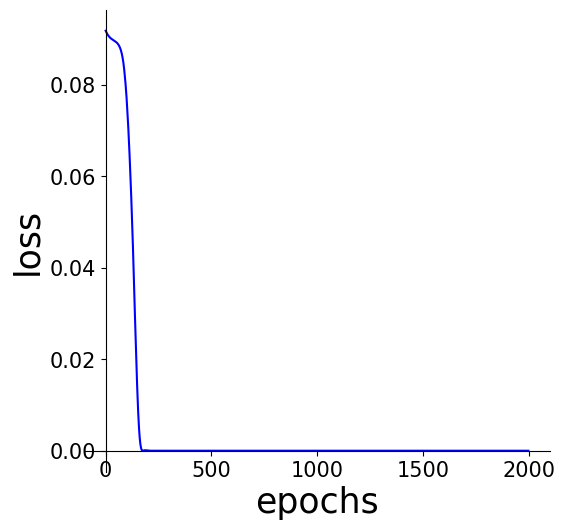

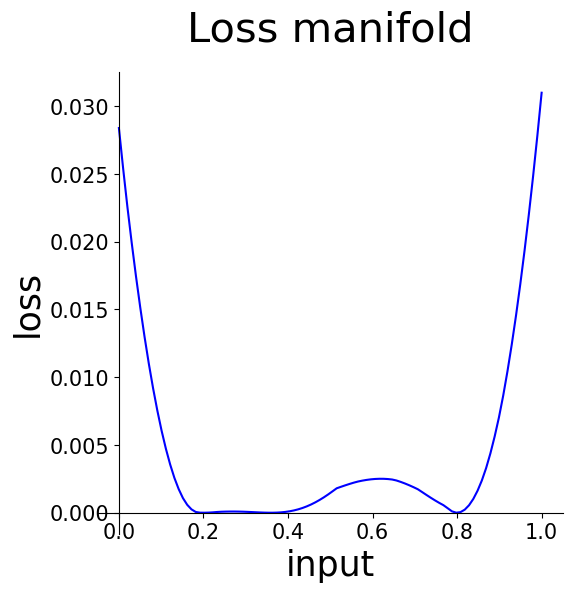

Plotting the output vs input profile


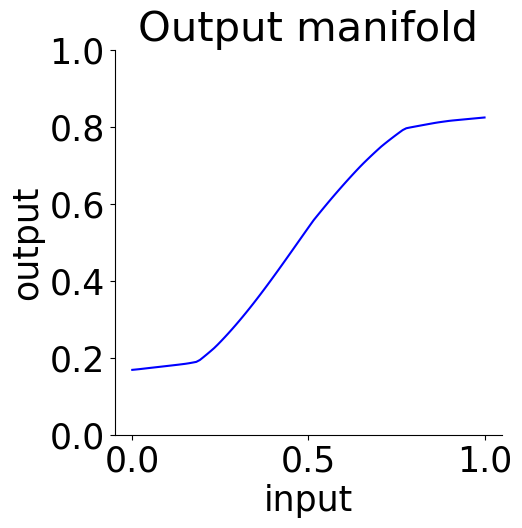

Apply Kaleidoscope sampling to get K samples
kaleioscopic sampling run: 0/30
kaleioscopic sampling run: 1/30
kaleioscopic sampling run: 2/30
kaleioscopic sampling run: 3/30
kaleioscopic sampling run: 4/30
kaleioscopic sampling run: 5/30
kaleioscopic sampling run: 6/30
kaleioscopic sampling run: 7/30
kaleioscopic sampling run: 8/30
kaleioscopic sampling run: 9/30
kaleioscopic sampling run: 10/30
kaleioscopic sampling run: 11/30
kaleioscopic sampling run: 12/30
kaleioscopic sampling run: 13/30
kaleioscopic sampling run: 14/30
kaleioscopic sampling run: 15/30
kaleioscopic sampling run: 16/30
kaleioscopic sampling run: 17/30
kaleioscopic sampling run: 18/30
kaleioscopic sampling run: 19/30
kaleioscopic sampling run: 20/30
kaleioscopic sampling run: 21/30
kaleioscopic sampling run: 22/30
kaleioscopic sampling run: 23/30
kaleioscopic sampling run: 24/30
kaleioscopic sampling run: 25/30
kaleioscopic sampling run: 26/30
kaleioscopic sampling run: 27/30
kaleioscopic sampling run: 28/30
kaleiosc

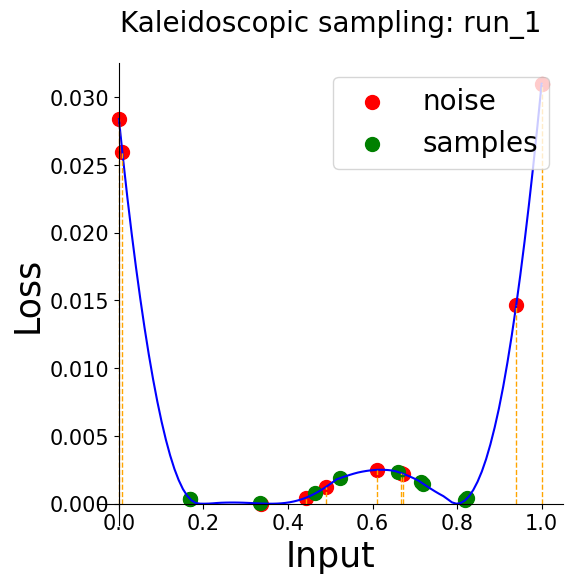

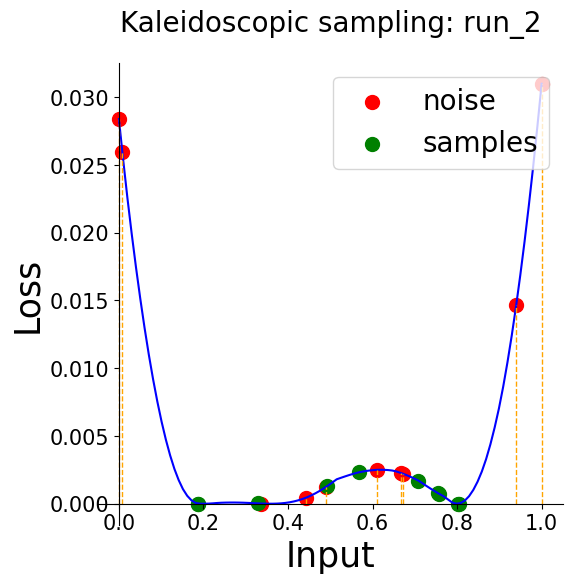

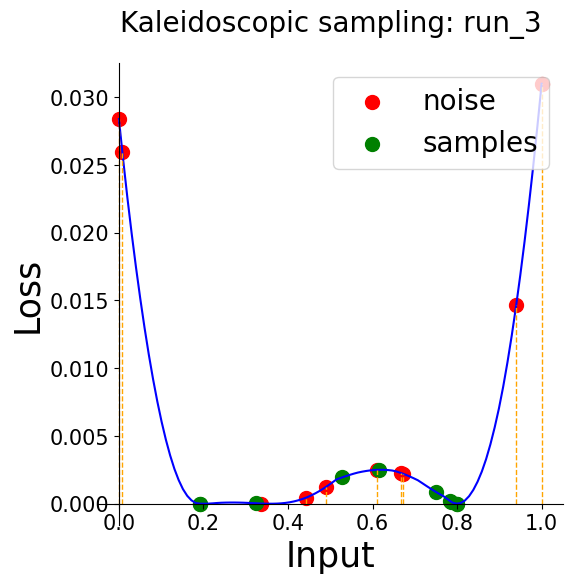

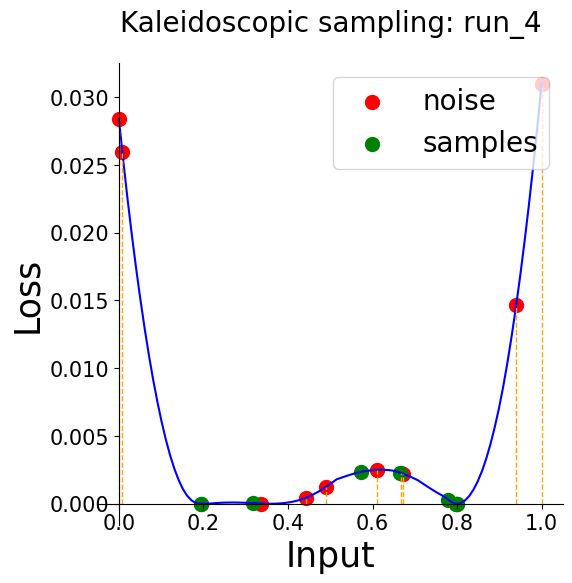

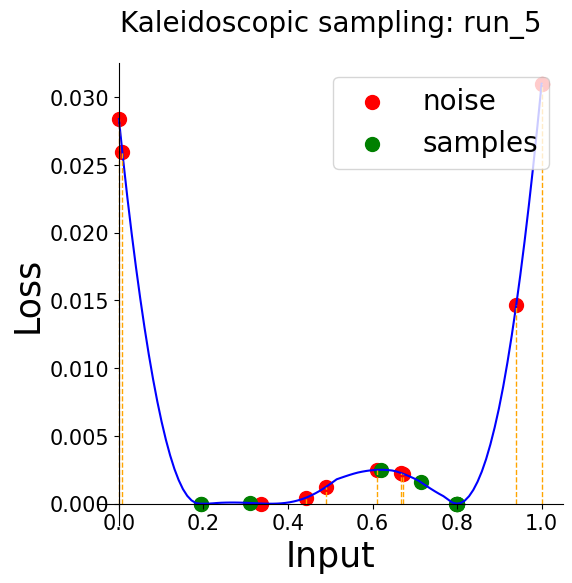

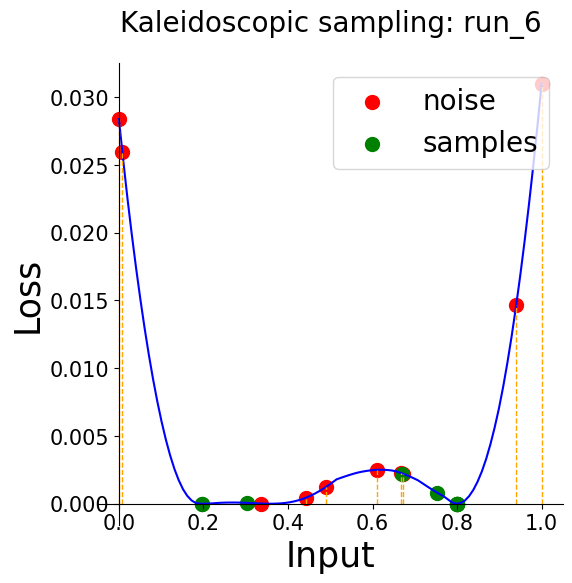

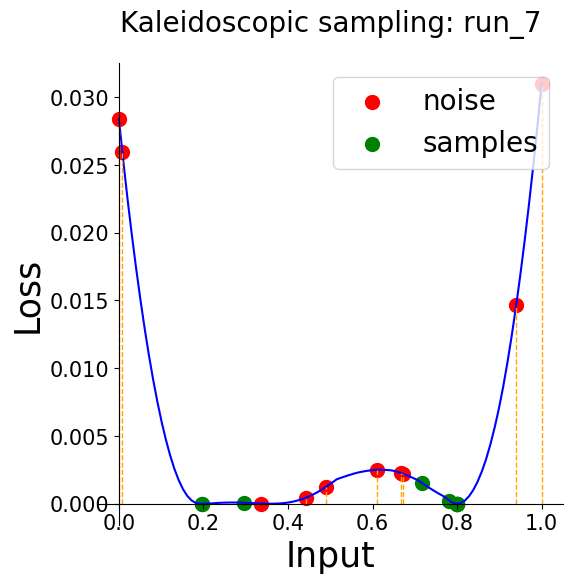

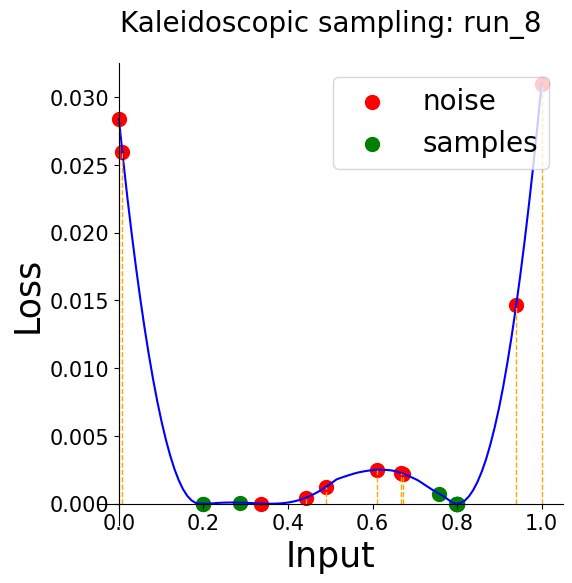

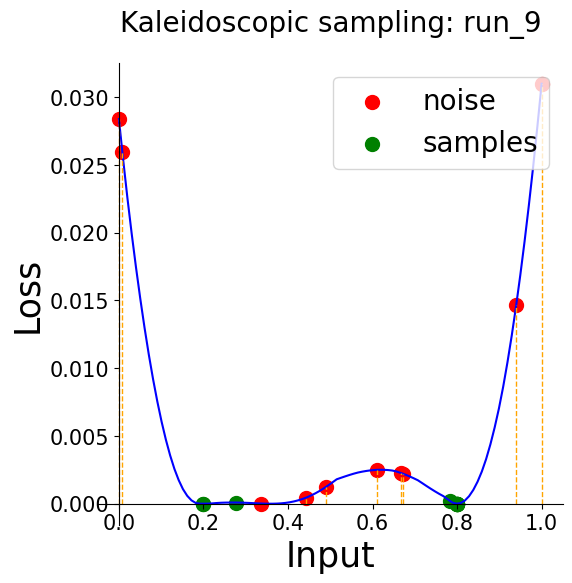

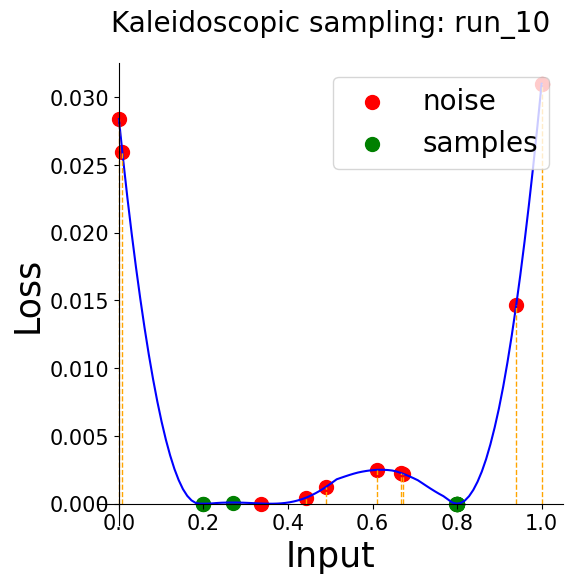

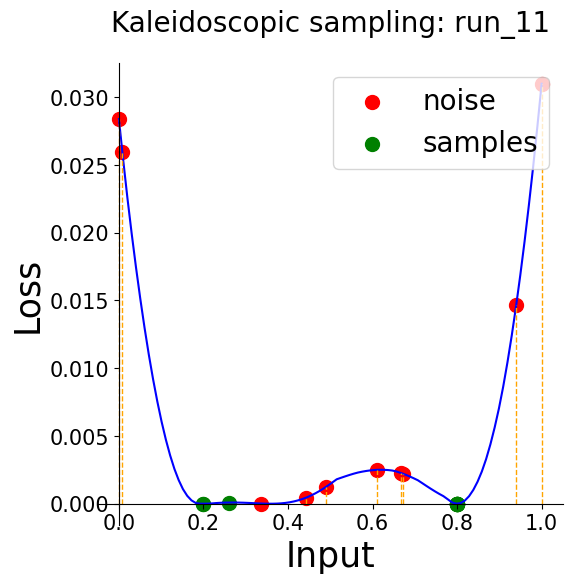

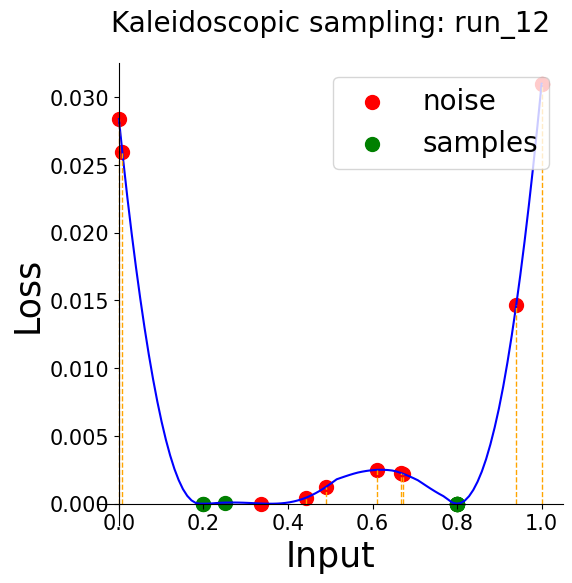

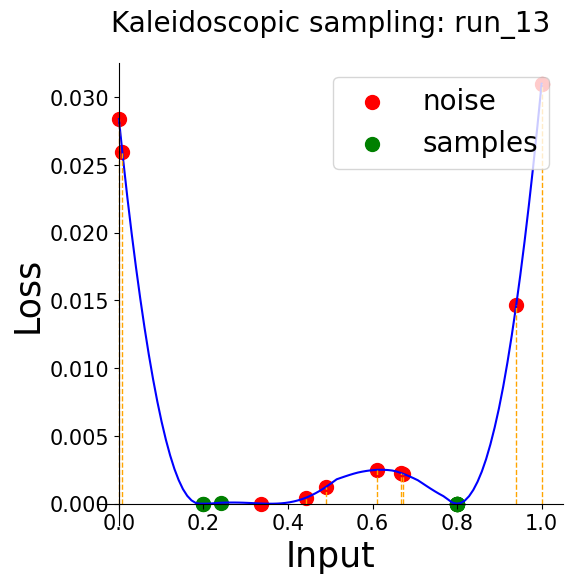

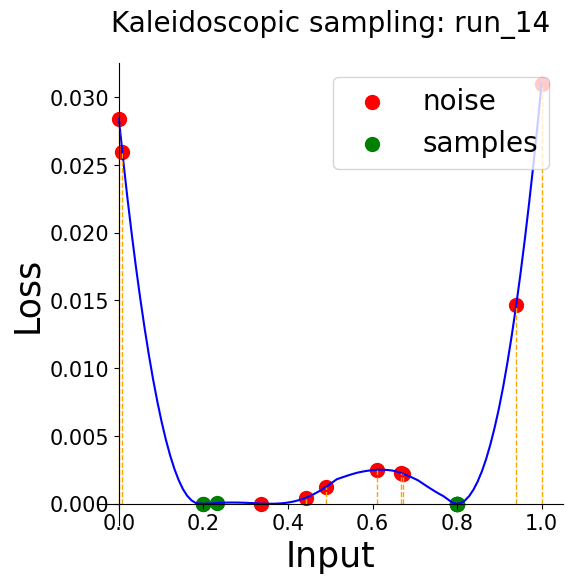

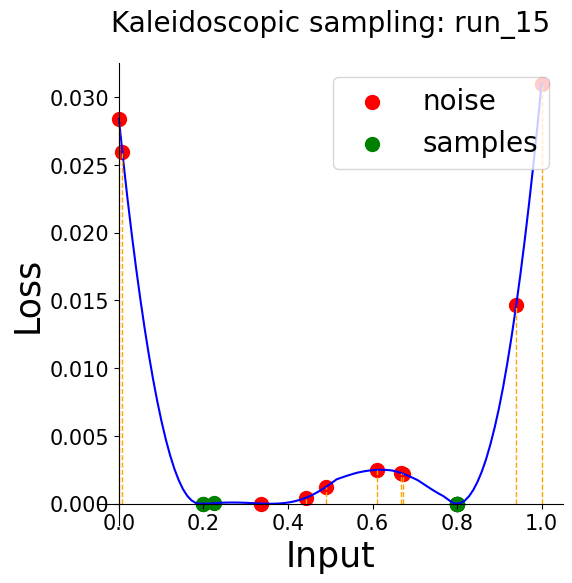

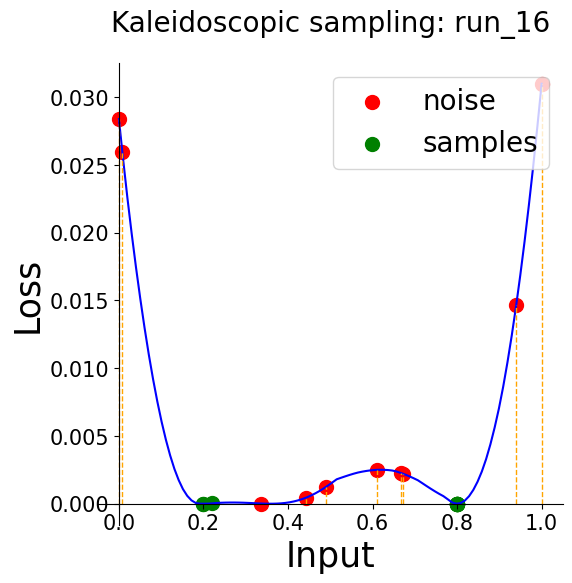

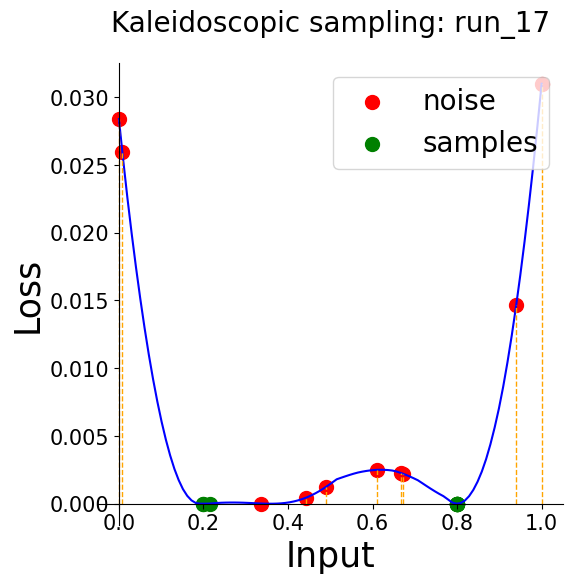

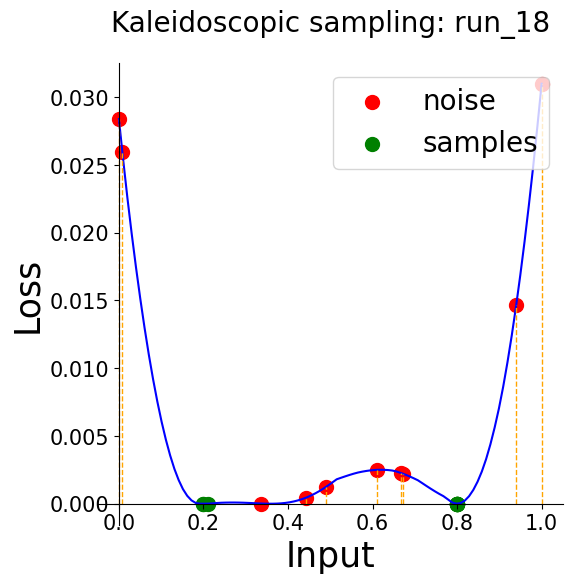

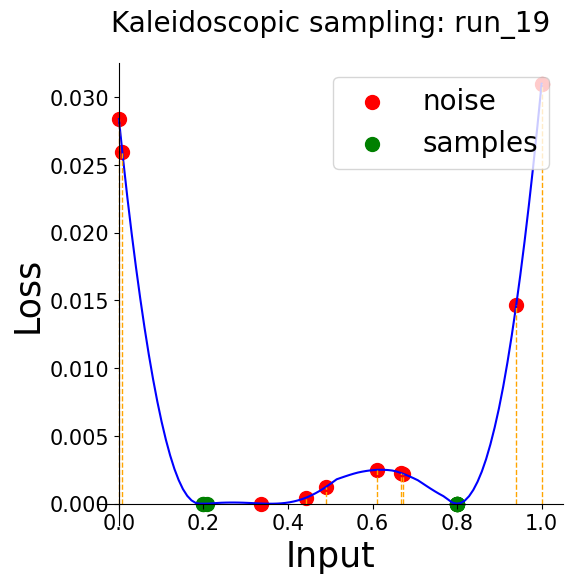

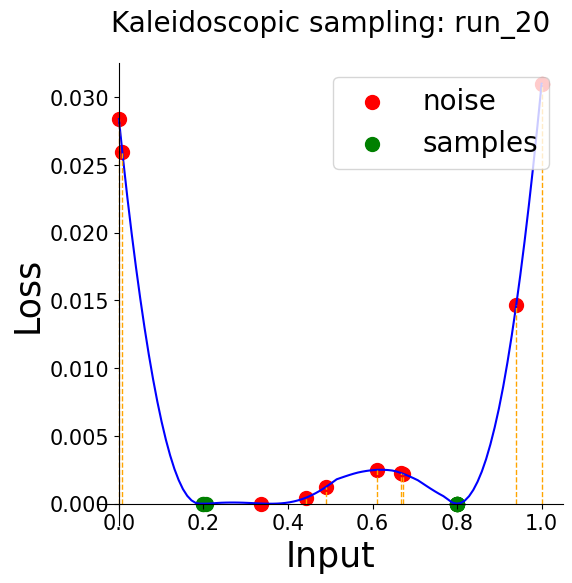

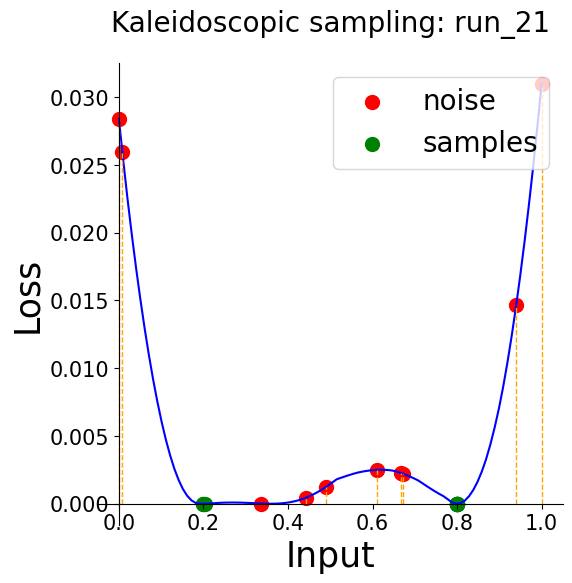

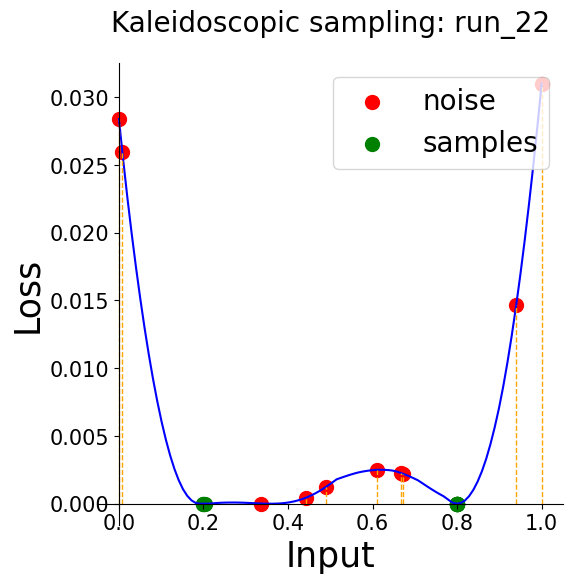

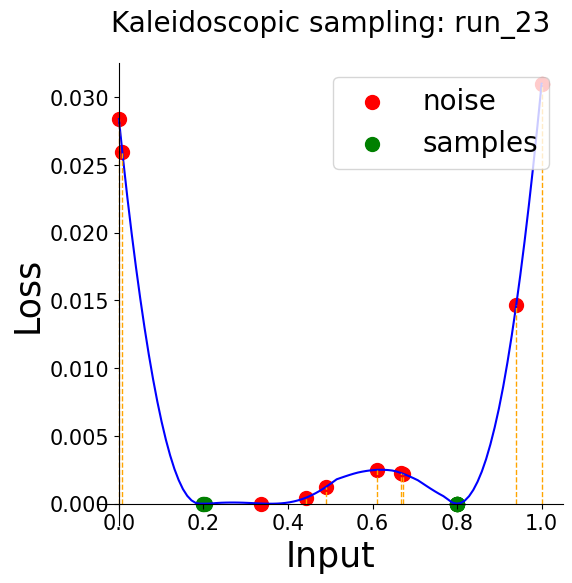

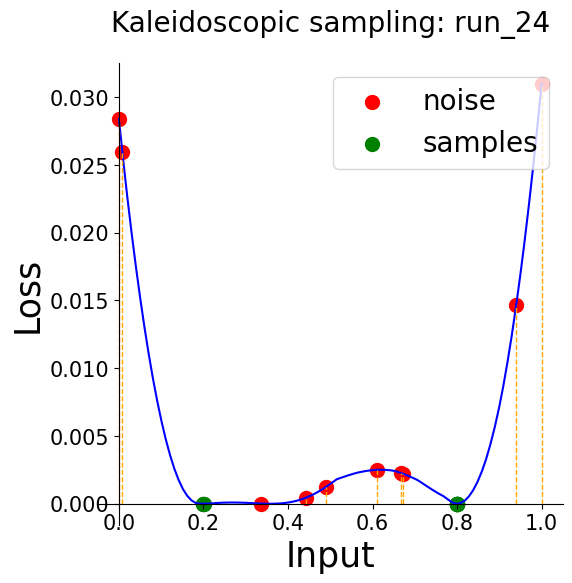

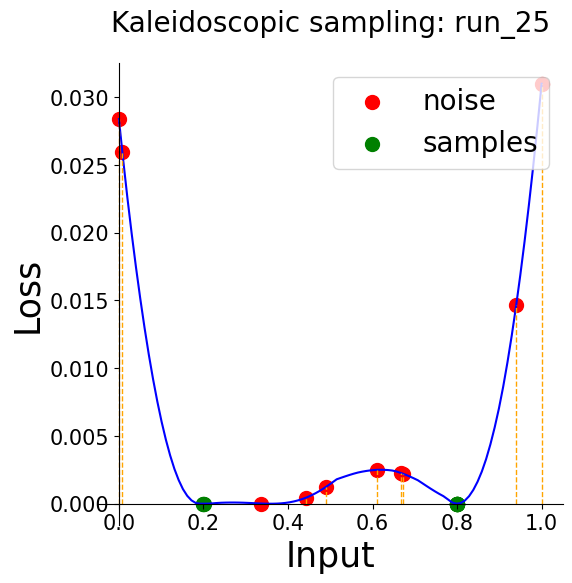

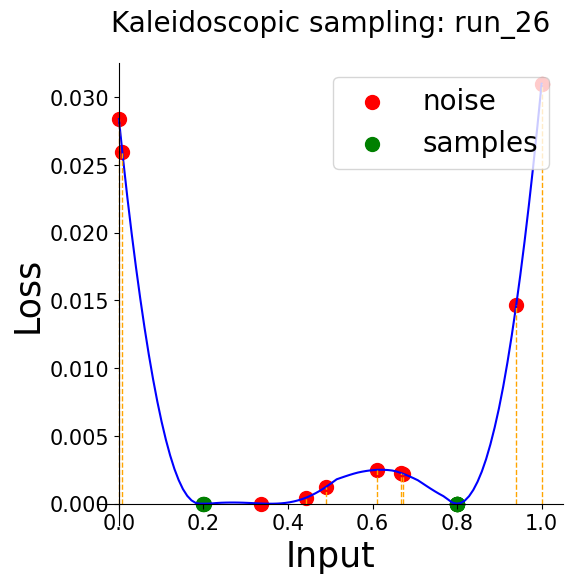

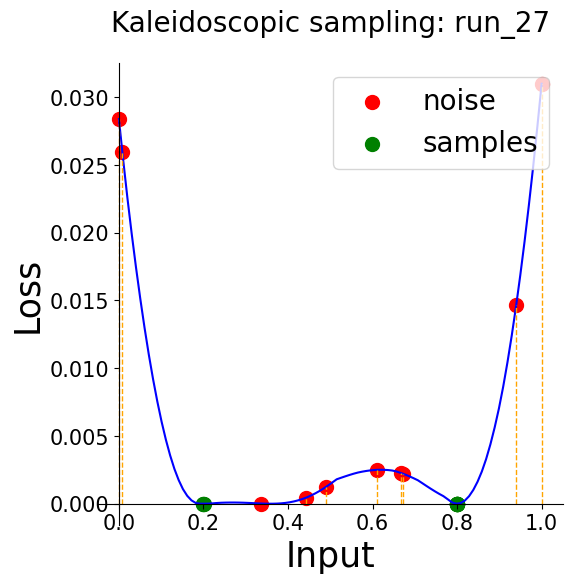

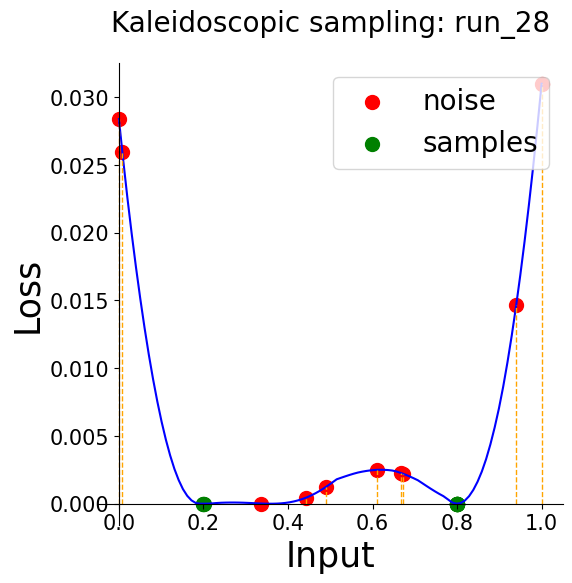

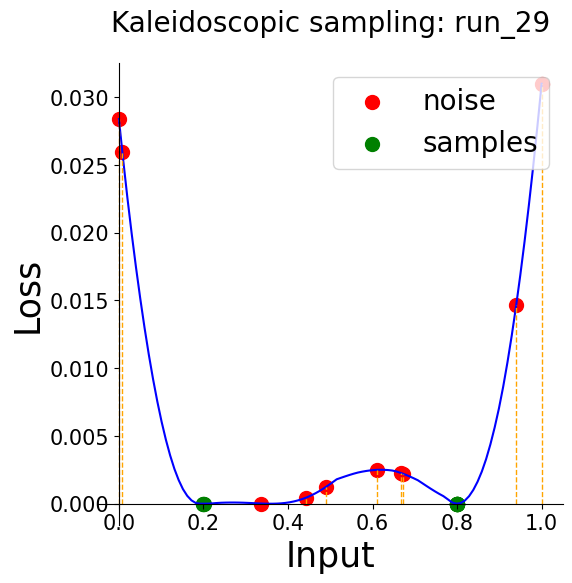

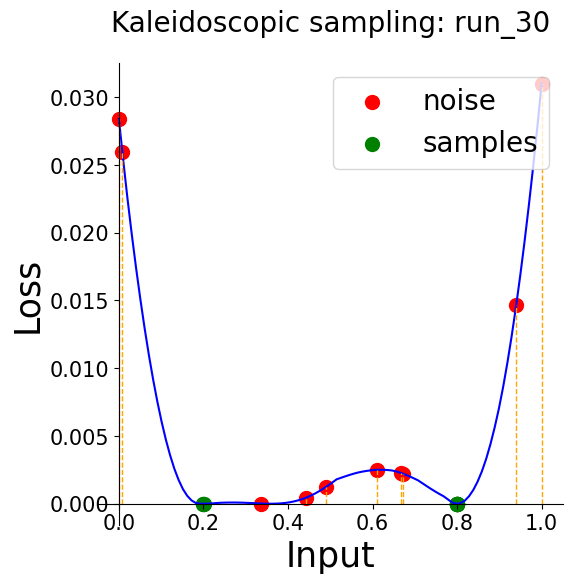

In [61]:
def multiple_pts_1D(X, H=5, sampling_runs=10, folder=None):
    X = pd.DataFrame(X, columns=['f0'])
    model_MLP = kals.manifold_learning_MLP(
        X,
        hidden_dim=H,
        epochs=2000,
        lr=0.001, 
        BATCH_SIZE=min(1000, X.shape[0]),
        model_type='MLP-synthetic',
        NORM=None,
        USE_CUDA=False, 
        pretrained_model=None, 
    )
    dp.manifold_sample_analysis_1D(model_MLP, 'Manifold MLP', sampling_runs=sampling_runs, save_folder=folder)

X = [0.2, 0.8]  # Data points for Manifold learning 
multiple_pts_1D(X, H=10, sampling_runs=30)

### Points in 2D space 

In [ ]:
def multiple_pts_2D(X, H=50, folder=None):
    # Convert to DataFrame
    X = pd.DataFrame(X, columns=['d0', 'd1'])
    model_MLP = kals.manifold_learning_MLP(
        X,
        hidden_dim=H,
        epochs=2000,
        lr=0.001,
        BATCH_SIZE=min(1000, X.shape[0]),
        model_type='MLP-synthetic',
        NORM=None,
        USE_CUDA=False, 
        pretrained_model=None, 
    )
    dp.manifold_sampling_analysis_2D(model_MLP, 'Manifold MLP', save_folder=folder, SAMPLING_RUNS=3)

# data points 
folder= None  # 'saved_images/synthetic_2D/'
X = [[0.2, 0.2], [0.2, 0.8], [0.8, 0.2], [0.8, 0.8]]
multiple_pts_2D(X, H=50, folder=folder)

### Behaviour of Neural Networks at higher dimensions

- Plot the log(#points)

In [ ]:
results_dim = []
dims = [2, 4]  # [1, 2, 4, 8, 16]
for dim in dims:
    results_dim.append(kals.loss_vs_num_pts_expt(dim=dim))

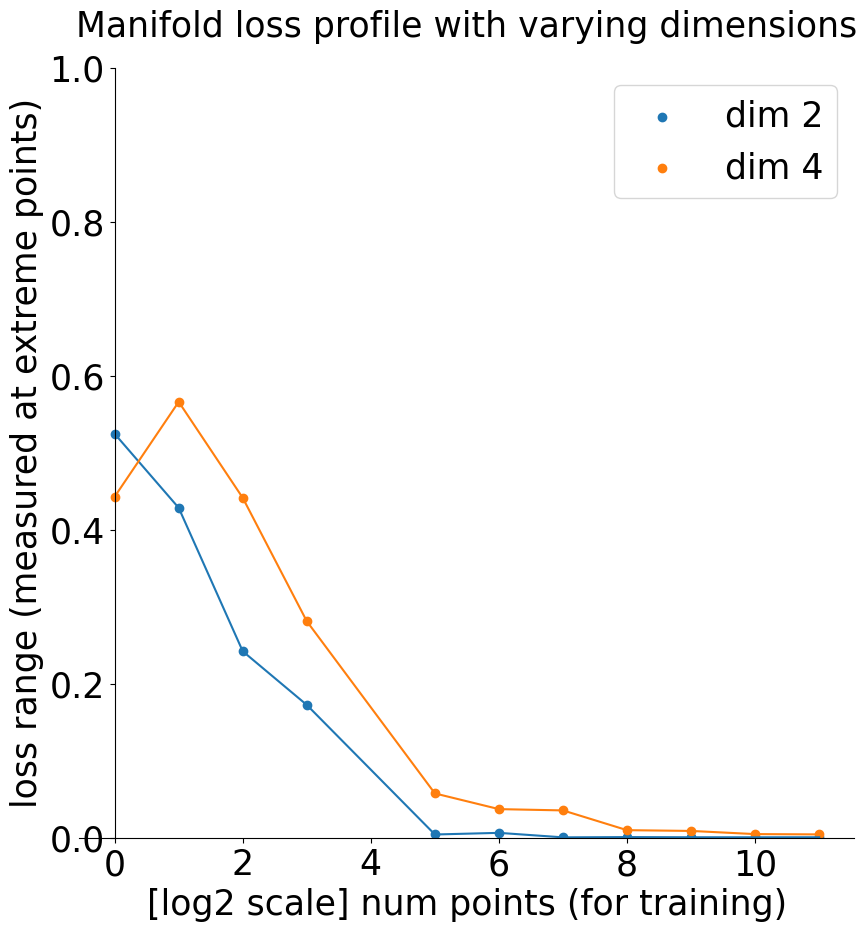

In [11]:
dp.plot_loss_vs_num_pts_vs_vary_dim(dims, results_dim)